In [ ]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import  cv2
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive_4.zip' -d '/content'

Archive:  /content/drive/MyDrive/archive_4.zip
  inflating: /content/TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: /content/TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: /content/TB_Chest_Radiog

In [ ]:
def showpic(folder_path,rowl,coll):
  file_list=os.listdir(folder_path)

  filerandom=random.sample(file_list,k=rowl*coll)

  fig,axs=plt.subplots(nrows=rowl,ncols=coll,figsize=(12,6))

  for i,filename in enumerate(filerandom):
    filepath=os.path.join(folder_path,filename)
    image = cv2.imread(filepath)
    row = i // coll
    col = i % coll
    axs[row, col].imshow(image[:,:,::-1])
    axs[row, col].set_title(filename)
  plt.tight_layout()
  plt.show()



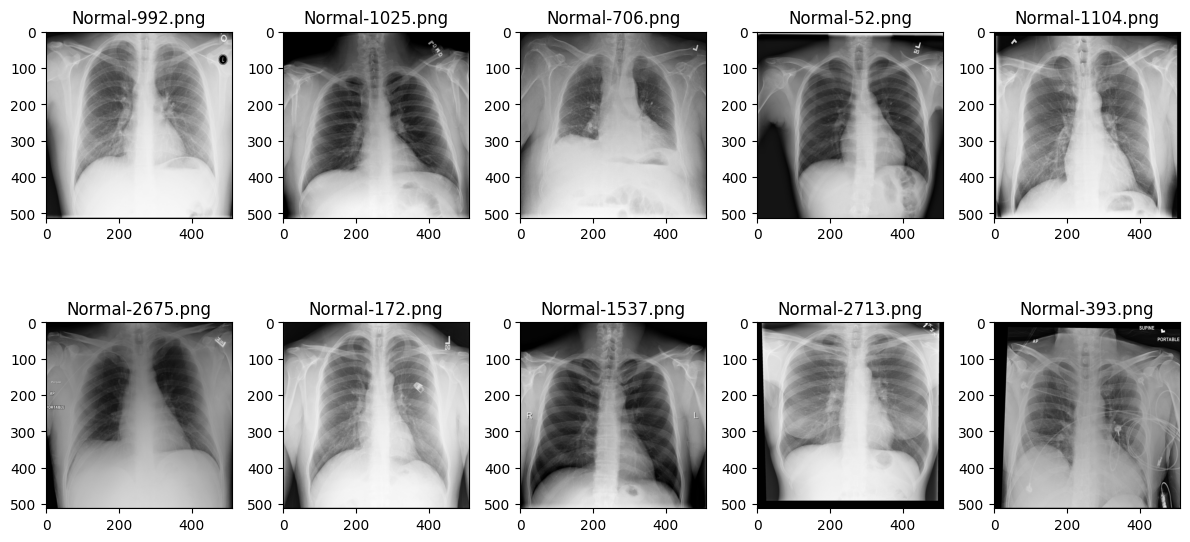

In [ ]:
showpic('/content/TB_Chest_Radiography_Database/Normal',2,5)

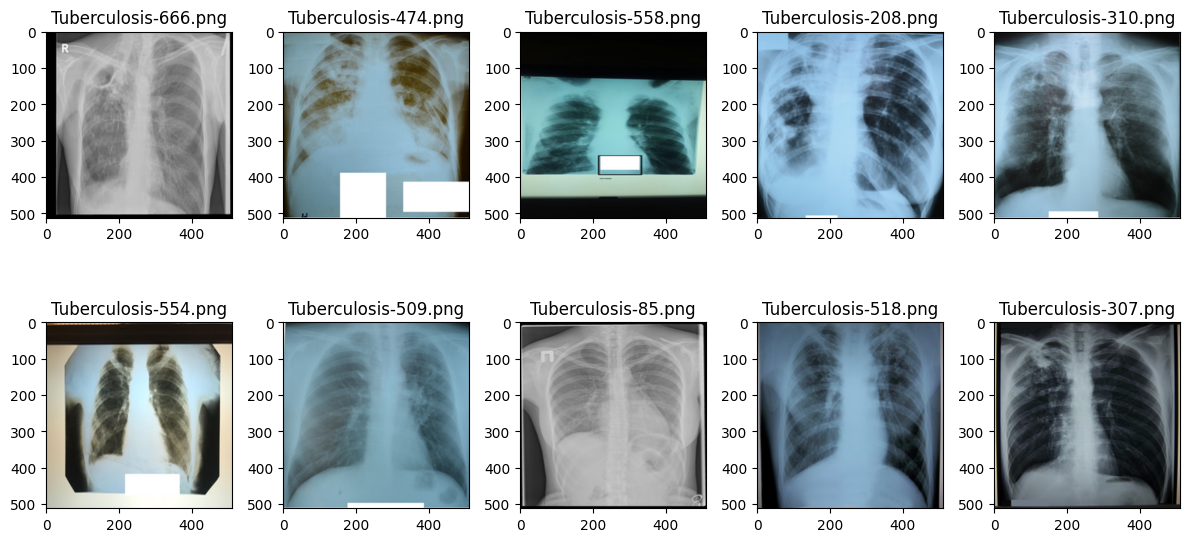

In [ ]:
showpic('/content/TB_Chest_Radiography_Database/Tuberculosis',2,5)

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            images.append(img)
    return images

In [ ]:
imgsnormal=[]
imgstuber=[]
# labels=[]
filebasenormal='/content/TB_Chest_Radiography_Database/Normal'
filebasetuber='/content/TB_Chest_Radiography_Database/Tuberculosis'

imgsnormal=load_images_from_folder(filebasenormal)
imgstube=load_images_from_folder(filebasetuber)


<h3>Augment for Tuberculosis images
</h3>

In [ ]:
imgstube=np.array(imgstube)
imgsnormal=np.array(imgsnormal)
print(imgstube.shape)

(700, 512, 512, 3)


(700, 512, 512, 3)


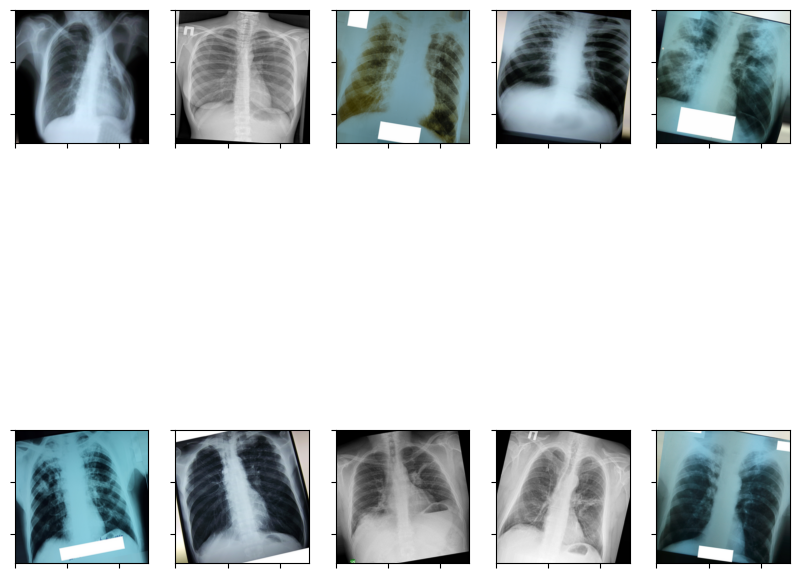

In [ ]:
# first augment is rotate
from sklearn.preprocessing import minmax_scale

# Define the ImageDataGenerator with random rotation augmentation
datagen = ImageDataGenerator(rotation_range=15)
# Generate randomly rotated images and store them in a new list
imgstube_rotate = []
for img in imgstube:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly rotated images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    rotated_img = batch.next()[0]
    rotated_img = minmax_scale(rotated_img.reshape(-1,1), feature_range=(0,255)).reshape(rotated_img.shape)
    rotated_img = rotated_img.astype('uint8')
    # Store the rotated image in the list
    imgstube_rotate.append(rotated_img)

# Convert the list of rotated images to a numpy array
imgstube_rotate = np.array(imgstube_rotate)
print(imgstube_rotate.shape)
# Plot the first 10 randomly rotated images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgstube_rotate[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

(700, 512, 512, 3)


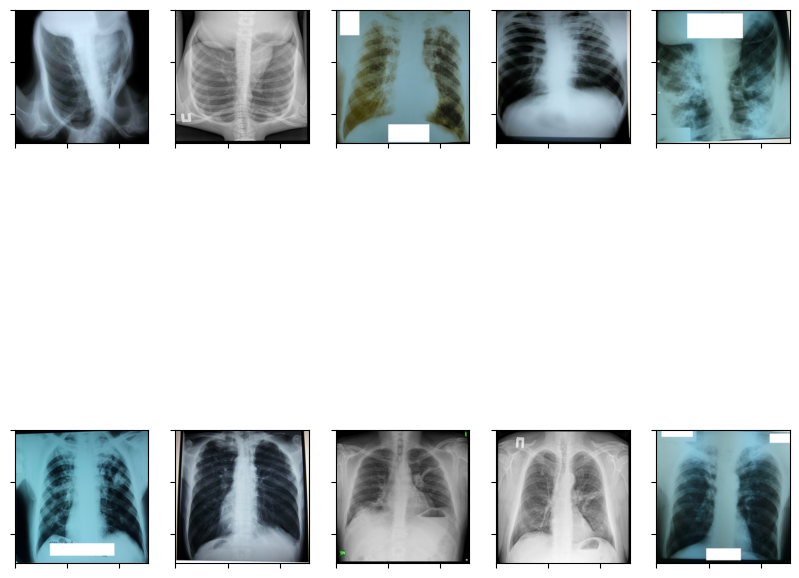

In [ ]:
# first augment is flip
from sklearn.preprocessing import minmax_scale

# Define the ImageDataGenerator with flip augmentation
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
# Generate randomly rotated images and store them in a new list
imgstube_flip = []
for img in imgstube:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly rotated images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    flip_img = batch.next()[0]
    flip_img = minmax_scale(flip_img.reshape(-1,1), feature_range=(0,255)).reshape(flip_img.shape)
    flip_img = flip_img.astype('uint8')
    # Store the rotated image in the list
    imgstube_flip.append(flip_img)

# Convert the list of rotated images to a numpy array
imgstube_flip = np.array(imgstube_flip)
print(imgstube_flip.shape)
# Plot the first 10 randomly rotated images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgstube_flip[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

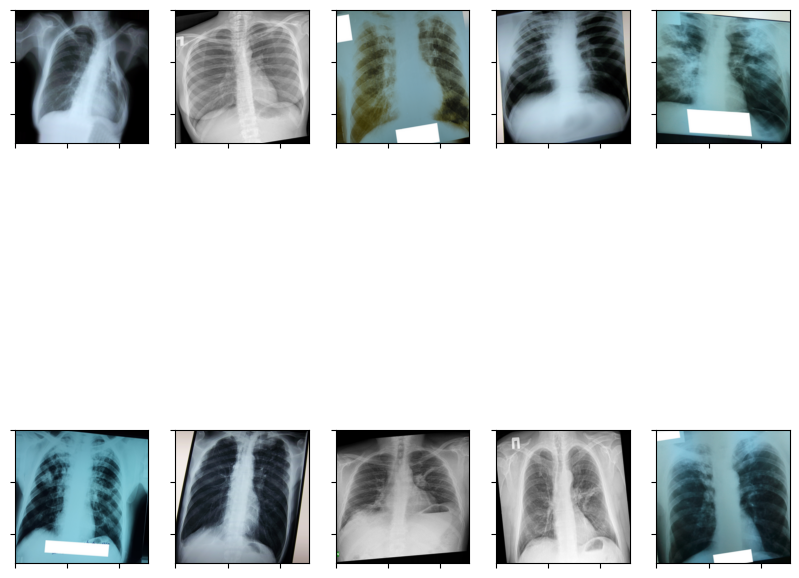

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with zoom, rotation, and shear augmentations
datagen = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=10,
    shear_range=10
)

# Generate randomly zoomed and rotated images and store them in a new list
imgstube_zoomrotate = []
for img in imgstube:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly zoomed, rotated, and sheared images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    zoomrotate_img = batch.next()[0]
    zoomrotate_img = minmax_scale(zoomrotate_img.reshape(-1,1), feature_range=(0,255)).reshape(zoomrotate_img.shape)
    zoomrotate_img = zoomrotate_img.astype('uint8')
    # Store the zoomed, rotated, and sheared image in the list
    imgstube_zoomrotate.append(zoomrotate_img)

# Convert the list of zoomed, rotated, and sheared images to a numpy array
imgstube_zoomrotate = np.array(imgstube_zoomrotate)

# Plot the first 10 randomly zoomed, rotated, and sheared images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgstube_zoomrotate[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

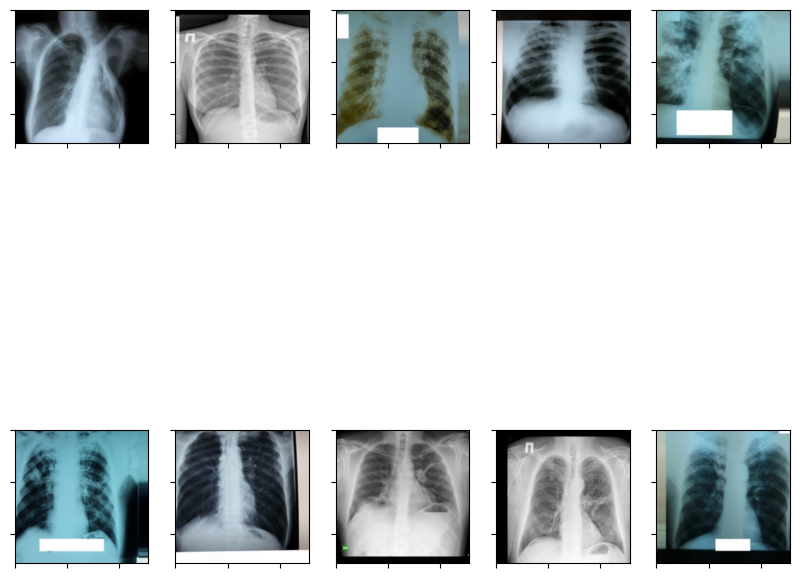

In [ ]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with Gaussian blur and random shift augmentations
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=lambda x: cv2.GaussianBlur(x, (5, 5), 1)
)

# Generate randomly shifted and blurred images and store them in a new list
imgstube_shiftblur = []
for img in imgstube:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly shifted and blurred images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    shiftblur_img = batch.next()[0]
    shiftblur_img = minmax_scale(shiftblur_img.reshape(-1,1), feature_range=(0,255)).reshape(shiftblur_img.shape)
    shiftblur_img = shiftblur_img.astype('uint8')
    # Store the shifted and blurred image in the list
    imgstube_shiftblur.append(shiftblur_img)

# Convert the list of shifted and blurred images to a numpy array
imgstube_shiftblur = np.array(imgstube_shiftblur)

# Plot the first 10 randomly shifted and blurred images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgstube_shiftblur[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

In [ ]:
imgstube_new = np.concatenate((imgstube, imgstube_shiftblur, imgstube_zoomrotate, imgstube_flip, imgstube_rotate))

# Print the shape of the new numpy array
print(imgstube_new.shape)

(3500, 512, 512, 3)


In [ ]:
# Define the name of the new directory
dirname = 'TubeXRAY'

# Define the name of the subdirectory to store the images in
subdirname = 'Tuberculosis'

# Define the path to the new directory
dirpath = '/content/drive/MyDrive/' + dirname

# Create the new directory if it doesn't already exist
if not os.path.exists(dirpath):
    os.makedirs(dirpath)

# Define the path to the subdirectory
subdirpath = dirpath + '/' + subdirname

# Create the subdirectory if it doesn't already exist
if not os.path.exists(subdirpath):
    os.makedirs(subdirpath)


# Upload the images to the subdirectory
for i, img in enumerate(imgstube_new):
    # Define the name of the image file
    filename = 'img{}.jpg'.format(i+1)
    # Define the path to the image file
    filepath = subdirpath + '/' + filename
    # Save the image file to disk
    cv2.imwrite(filepath, img)

<h3>Augment for Normal Image</h3>

In [ ]:
print(imgsnormal.shape)

# Generate a random permutation of the indices
indices = np.random.permutation(len(imgsnormal))

# Define the number of parts to split the array into
num_parts = 5

# Split the array into num_parts parts
parts = np.array_split(imgsnormal[indices], num_parts)


(3500, 512, 512, 3)


In [ ]:
print(parts[0].shape)

(700, 512, 512, 3)


(700, 512, 512, 3)


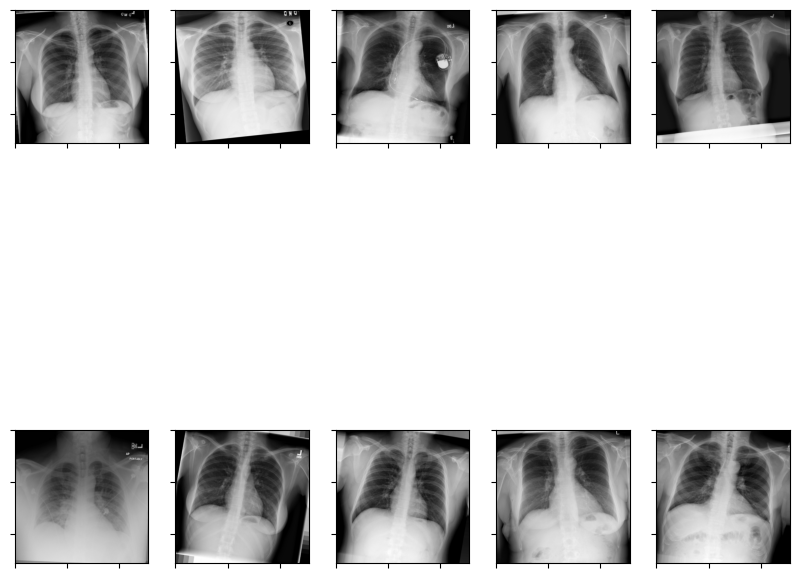

In [ ]:
# first augment is rotate
from sklearn.preprocessing import minmax_scale

# Define the ImageDataGenerator with random rotation augmentation
datagen = ImageDataGenerator(rotation_range=15)
# Generate randomly rotated images and store them in a new list
imgsnormal_rotate = []
for img in parts[0]:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly rotated images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    rotated_img = batch.next()[0]
    rotated_img = minmax_scale(rotated_img.reshape(-1,1), feature_range=(0,255)).reshape(rotated_img.shape)
    rotated_img = rotated_img.astype('uint8')
    # Store the rotated image in the list
    imgsnormal_rotate.append(rotated_img)

# Convert the list of rotated images to a numpy array
imgsnormal_rotate = np.array(imgsnormal_rotate)
print(imgsnormal_rotate.shape)
# Plot the first 10 randomly rotated images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgsnormal_rotate[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

(700, 512, 512, 3)


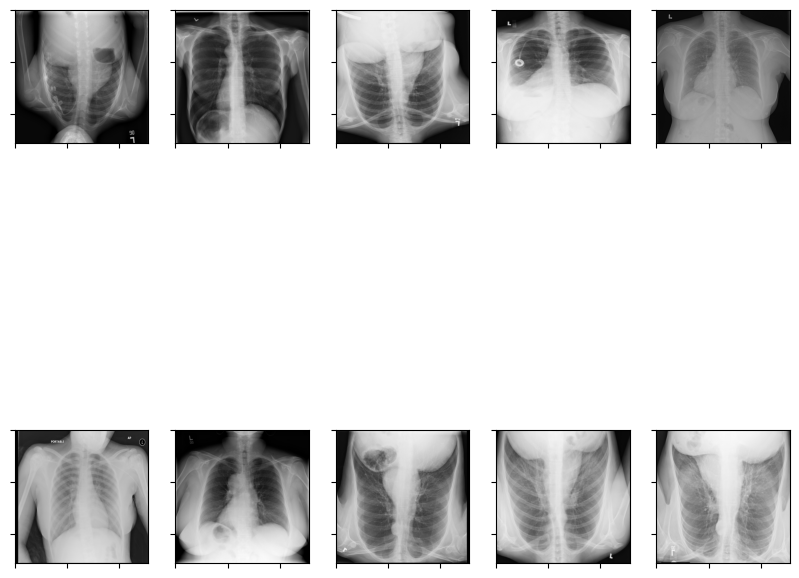

In [ ]:
# first augment is flip
from sklearn.preprocessing import minmax_scale

# Define the ImageDataGenerator with flip augmentation
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
# Generate randomly rotated images and store them in a new list
imgsnormal_flip = []
for img in parts[1]:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly rotated images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    flip_img = batch.next()[0]
    flip_img = minmax_scale(flip_img.reshape(-1,1), feature_range=(0,255)).reshape(flip_img.shape)
    flip_img = flip_img.astype('uint8')
    # Store the rotated image in the list
    imgsnormal_flip.append(flip_img)

# Convert the list of rotated images to a numpy array
imgsnormal_flip = np.array(imgsnormal_flip)
print(imgsnormal_flip.shape)
# Plot the first 10 randomly rotated images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgsnormal_flip[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

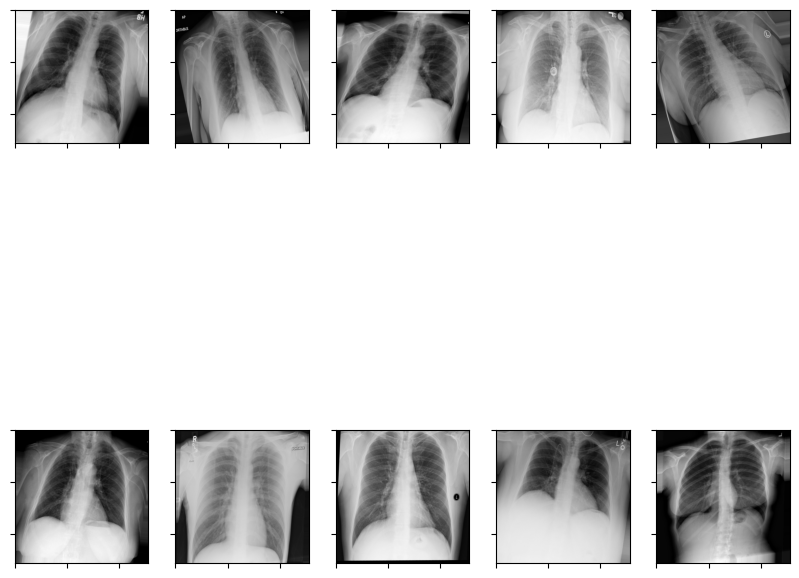

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with zoom, rotation, and shear augmentations
datagen = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=10,
    shear_range=10
)

# Generate randomly zoomed and rotated images and store them in a new list
imgsnormal_zoomrotate = []
for img in parts[2]:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly zoomed, rotated, and sheared images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    zoomrotate_img = batch.next()[0]
    zoomrotate_img = minmax_scale(zoomrotate_img.reshape(-1,1), feature_range=(0,255)).reshape(zoomrotate_img.shape)
    zoomrotate_img = zoomrotate_img.astype('uint8')
    # Store the zoomed, rotated, and sheared image in the list
    imgsnormal_zoomrotate.append(zoomrotate_img)

# Convert the list of zoomed, rotated, and sheared images to a numpy array
imgsnormal_zoomrotate = np.array(imgsnormal_zoomrotate)

# Plot the first 10 randomly zoomed, rotated, and sheared images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgsnormal_zoomrotate[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

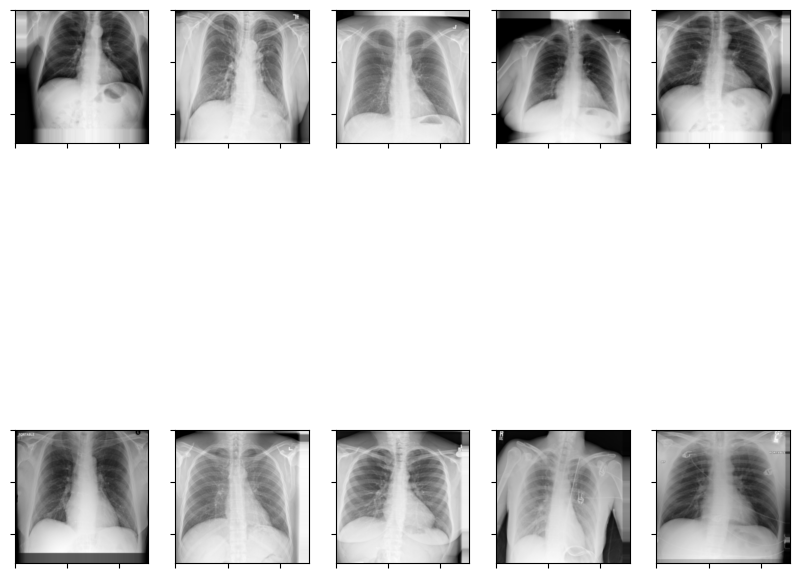

In [ ]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with Gaussian blur and random shift augmentations
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=lambda x: cv2.GaussianBlur(x, (5, 5), 1)
)

# Generate randomly shifted and blurred images and store them in a new list
imgsnormal_shiftblur = []
for img in parts[3]:
    # Reshape the image to add a channel dimension
    img = img.reshape((1,) + img.shape)
    # Generate a batch of randomly shifted and blurred images
    batch = datagen.flow(img, batch_size=1, shuffle=False)
    # Extract the first image from the batch and add a channel dimension
    shiftblur_img = batch.next()[0]
    shiftblur_img = minmax_scale(shiftblur_img.reshape(-1,1), feature_range=(0,255)).reshape(shiftblur_img.shape)
    shiftblur_img = shiftblur_img.astype('uint8')
    # Store the shifted and blurred image in the list
    imgsnormal_shiftblur.append(shiftblur_img)

# Convert the list of shifted and blurred images to a numpy array
imgsnormal_shiftblur = np.array(imgsnormal_shiftblur)

# Plot the first 10 randomly shifted and blurred images
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(imgsnormal_shiftblur[i][:,:,::-1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

In [ ]:
# Define the name of the new directory
dirname = 'TubeXRAY'

# Define the name of the subdirectory to store the images in
subdirname = 'Normal'

# Define the path to the new directory
dirpath = '/content/drive/MyDrive/' + dirname

# Create the new directory if it doesn't already exist
if not os.path.exists(dirpath):
    os.makedirs(dirpath)

# Define the path to the subdirectory
subdirpath = dirpath + '/' + subdirname

# Create the subdirectory if it doesn't already exist
if not os.path.exists(subdirpath):
    os.makedirs(subdirpath)


# Upload the images to the directory
for img_array_name, img_array in {'parts_4': parts[4], 'imgsnormal_shiftblur': imgsnormal_shiftblur, 'imgsnormal_zoomrotate': imgsnormal_zoomrotate, 'imgsnormal_flip': imgsnormal_flip, 'imgsnormal_rotate': imgsnormal_rotate}.items():
    i=0
    for img in img_array:
        i+=1
        # Define the name of the image file
        filename = '{}_img{}.jpg'.format(img_array_name, i+1)
        # Define the path to the image file
        filepath = subdirpath + '/' + filename
        # Save the image file to disk
        cv2.imwrite(filepath, img)

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.2, random_state=42)

In [ ]:
# x_train_reshaped = np.reshape(x_train, (x_train.shape[0], -1))

# n,img_width, img_height, img_channels=x_train.shape

# smote = SMOTE(random_state=42)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train_reshaped, y_train)
# x_train_resampled = x_train_resampled.reshape(-1, img_width, img_height, img_channels)

# print(x_train_resampled.shape,y_train_resampled.shape)

In [ ]:
# # identify the indices of the resampled examples
# resampled_indices = np.where(y_train_resampled != y_train)[0]

# # randomly select 9 resampled examples
# indices = np.random.choice(resampled_indices, size=9)
# samples = x_train_resampled[indices]
# labels = y_train_resampled[indices]

# # plot the selected samples
# fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(samples[i].reshape(img_width, img_height, img_channels))
#     ax.set_title(f"Label: {labels[i]}")
#     ax.axis("off")
# plt.show()